In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../notebooks/optimized_data.csv')
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,discharge_disposition_id_new,admission_source_id,admission_source_id_new,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,Not Mapped,D25,Physician Referral,AS1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),Emergency,Discharged to home,D1,Emergency Room,AS7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,D1,Emergency Room,AS7,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),Emergency,Discharged to home,D1,Emergency Room,AS7,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),Emergency,Discharged to home,D1,Emergency Room,AS7,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,443847548,100162476,AfricanAmerican,Male,[70-80),Emergency,Discharged/transferred to SNF,D3,Emergency Room,AS7,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101759,443847782,74694222,AfricanAmerican,Female,[80-90),Emergency,Discharged/transferred to ICF,D4,Transfer from a Skilled Nursing Facility (SNF),AS5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101760,443854148,41088789,Caucasian,Male,[70-80),Emergency,Discharged to home,D1,Emergency Room,AS7,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101761,443857166,31693671,Caucasian,Female,[80-90),Urgent,Discharged/transferred to SNF,D3,Emergency Room,AS7,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [3]:
a = df.loc[df['time_in_hospital'] == 8]['age'].value_counts()
a

[70-80)     1230
[60-70)     1012
[80-90)      851
[50-60)      641
[40-50)      363
[90-100)     130
[30-40)      114
[20-30)       35
[10-20)       13
[0-10)         1
Name: age, dtype: int64

In [4]:
df.loc[(df['time_in_hospital'] == 8) & (df['age'] == '[0-10)')]

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,discharge_disposition_id_new,admission_source_id,admission_source_id_new,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
2935,18757914,7691157,AfricanAmerican,Male,[0-10),Elective,Discharged to home,D1,Physician Referral,AS1,...,No,No,No,No,No,No,No,No,No,NO


In [5]:
import numpy as np

In [6]:
np.repeat(0.01,5)

array([0.01, 0.01, 0.01, 0.01, 0.01])

In [7]:
df.loc[(df['time_in_hospital'] == 8) & (df['age'].isin(['[0-10)', '[20-30)', '[30-40)']))]['age'].value_counts().sort_index()

[0-10)       1
[20-30)     35
[30-40)    114
Name: age, dtype: int64

In [8]:
df.loc[(df['time_in_hospital'].between(1,14)) & (df['age'].isin(['[0-10)', '[50-60)']))]['age'].value_counts().sort_index()

[0-10)       161
[50-60)    17256
Name: age, dtype: int64

In [9]:
discharge = df['discharge_disposition_id_new'].value_counts()[:5]
discharge

D1     60232
D3     13954
D6     12902
D2      2128
D22     1992
Name: discharge_disposition_id_new, dtype: int64

In [10]:
tt_dis = discharge[:3]
tt_dis

D1    60232
D3    13954
D6    12902
Name: discharge_disposition_id_new, dtype: int64

In [11]:
others_discharge = pd.Series(discharge[3:].sum())
others_discharge

0    4120
dtype: int64

In [12]:
others_discharge = others_discharge.rename(index = {0: 'Others'})
others_discharge

Others    4120
dtype: int64

In [13]:
dis = pd.concat([tt_dis, others_discharge])

In [14]:
comp = df['gender'].value_counts()
comp

Female    54708
Male      47055
Name: gender, dtype: int64

In [15]:
comp[:1]

Female    54708
Name: gender, dtype: int64

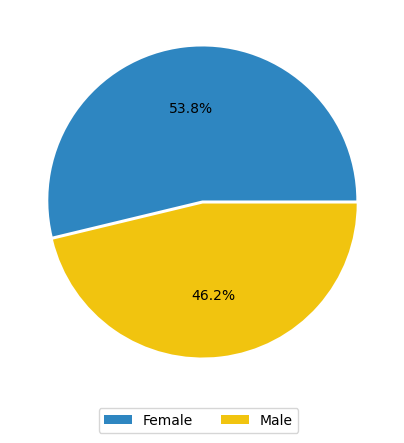

In [16]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()

# Plotting line
ax.pie(comp, autopct='%1.1f%%', explode=np.repeat(0.01, len(comp)), 
       colors=['#2E86C1', '#F1C40F', '#EC7063', '#1ABC9C', '#8E44AD'])

# setting title
# ax.set_title('Composition of Male and Female Patients')

ax.legend(comp[:7].index, loc=(0.23, -0.1), ncol=2)

plt.show()

In [17]:
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,discharge_disposition_id_new,admission_source_id,admission_source_id_new,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,Not Mapped,D25,Physician Referral,AS1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),Emergency,Discharged to home,D1,Emergency Room,AS7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,D1,Emergency Room,AS7,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),Emergency,Discharged to home,D1,Emergency Room,AS7,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),Emergency,Discharged to home,D1,Emergency Room,AS7,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,443847548,100162476,AfricanAmerican,Male,[70-80),Emergency,Discharged/transferred to SNF,D3,Emergency Room,AS7,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101759,443847782,74694222,AfricanAmerican,Female,[80-90),Emergency,Discharged/transferred to ICF,D4,Transfer from a Skilled Nursing Facility (SNF),AS5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101760,443854148,41088789,Caucasian,Male,[70-80),Emergency,Discharged to home,D1,Emergency Room,AS7,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101761,443857166,31693671,Caucasian,Female,[80-90),Urgent,Discharged/transferred to SNF,D3,Emergency Room,AS7,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [18]:
specialty = df.loc[df['medical_specialty'] != '?']['medical_specialty']
specialty

0         Pediatrics-Endocrinology
9                 InternalMedicine
12          Family/GeneralPractice
13          Family/GeneralPractice
17                      Cardiology
                    ...           
101732            Emergency/Trauma
101740            Emergency/Trauma
101744            InternalMedicine
101746                 Orthopedics
101761             Surgery-General
Name: medical_specialty, Length: 51816, dtype: object

In [19]:
specialty_sort = specialty.value_counts()[:5]
specialty_sort

InternalMedicine          14635
Emergency/Trauma           7565
Family/GeneralPractice     7440
Cardiology                 5351
Surgery-General            3099
Name: medical_specialty, dtype: int64

In [20]:
spec_male = df[(df['gender'] == 'Male') & df['medical_specialty'].isin(specialty_sort.index)]['medical_specialty'].value_counts()
spec_male

InternalMedicine          6288
Emergency/Trauma          3483
Family/GeneralPractice    3248
Cardiology                2975
Surgery-General           1472
Name: medical_specialty, dtype: int64

In [21]:
df[(df['gender'] == 'Male') & (df['time_in_hospital'] == 7)]['age'].value_counts()

[70-80)     714
[60-70)     638
[80-90)     461
[50-60)     417
[40-50)     242
[30-40)      75
[90-100)     60
[20-30)      14
[10-20)       6
Name: age, dtype: int64

In [22]:
tt = df['time_in_hospital'].value_counts()
tt

3     17756
2     17224
1     14206
4     13924
5      9966
6      7539
7      5859
8      4390
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: time_in_hospital, dtype: int64

In [23]:
range(len(tt))

range(0, 14)

In [24]:
np.array(tt.index)

array([ 3,  2,  1,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int64)

In [25]:
df.loc[(df['age'].isin(['[0-10)', '[20-30)'])) & (df['time_in_hospital'] == 14)]['admission_source_id_new'].value_counts()

AS7    4
AS1    3
AS5    2
AS2    1
Name: admission_source_id_new, dtype: int64

In [26]:
df.loc[(df['gender'] == 'Male') & (df['age'].isin(['[0-10)', '[20-30)'])) & (df['time_in_hospital'] == 14)]['admission_source_id_new'].value_counts()

AS2    1
AS7    1
Name: admission_source_id_new, dtype: int64

In [27]:
nn = pd.Series(0)

In [28]:
nn

0    0
dtype: int64

In [29]:
pd.Series([], dtype=int)

Series([], dtype: int32)

In [30]:
num = [1,2]

In [31]:
missing_addm_male = pd.Series([])

for i in num:

    missing_addm_male = missing_addm_male.append(pd.Series(0))

C:\Users\DELL\AppData\Local\Temp\ipykernel_6620\3928211226.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  missing_addm_male = pd.Series([])
C:\Users\DELL\AppData\Local\Temp\ipykernel_6620\3928211226.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_addm_male = missing_addm_male.append(pd.Series(0))


In [32]:
missing_addm_male

0    0
0    0
dtype: int64

In [33]:
missing_addm_male.rename(index = {0: 1})

1    0
1    0
dtype: int64

In [34]:
# Getting the top 5 admission source id
addm = df.loc[(df['age'].isin(['[0-10)', '[20-30)'])) & 
              (df['time_in_hospital'] == 14)]['admission_source_id_new'].value_counts()[:5].sort_index()
addm

AS1    3
AS2    1
AS5    2
AS7    4
Name: admission_source_id_new, dtype: int64

In [35]:
# Getting the index value of the top 5 admission source id
addm_index = np.array(addm.index)
addm_index

array(['AS1', 'AS2', 'AS5', 'AS7'], dtype=object)

In [36]:
# Getting the top 5 admission source id with its count for the male patients
male_addm = df.loc[(df['gender'] == 'Male') & (df['age'].isin(['[0-10)', '[20-30)'])) & 
                   (df['time_in_hospital'] == 14)]['admission_source_id_new'].value_counts()
male_addm

AS2    1
AS7    1
Name: admission_source_id_new, dtype: int64

In [37]:
# Getting the top 5 admission source id with its for the female patients
female_addm = df.loc[(df['gender'] == 'Female') & (df['age'].isin(['[0-10)', '[20-30)'])) & 
                     (df['time_in_hospital'] == 14)]['admission_source_id_new'].value_counts()
    
female_addm

AS1    3
AS7    3
AS5    2
Name: admission_source_id_new, dtype: int64

In [38]:
if (len(male_addm) != len(addm_index)) & (len(female_addm) != len(addm_index)):
    
    missing_addm_male = pd.Series([])
    
    m_val = []
    
    for i in addm_index:
        
        if i not in male_addm.index:
            
            missing_addm_male = missing_addm_male.append(pd.Series(0))
            
            #missing_addm_male = missing_addm_male.rename(index={0: i})
            
#male_addm = pd.concat([missing_addm_male, male_addm])

C:\Users\DELL\AppData\Local\Temp\ipykernel_6620\803865754.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  missing_addm_male = pd.Series([])
C:\Users\DELL\AppData\Local\Temp\ipykernel_6620\803865754.py:11: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_addm_male = missing_addm_male.append(pd.Series(0))


In [39]:
missing_addm_male

0    0
0    0
dtype: int64

In [40]:
missing_addm_male

0    0
0    0
dtype: int64

In [41]:
male_addm

AS2    1
AS7    1
Name: admission_source_id_new, dtype: int64

In [42]:
if (len(female_addm) != len(addm_index)) & (len(male_addm) != len(addm_index)):
    
    missing_addm_female = pd.Series([])

    for i in addm_index:

        if i not in female_addm.index:

            missing_addm_female = missing_addm_female.append(pd.Series(0))
            
            missing_addm_female = missing_addm_female.rename(index={0: i})

female_addm = pd.concat([missing_addm_female, female_addm])            

C:\Users\DELL\AppData\Local\Temp\ipykernel_6620\4063646245.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  missing_addm_female = pd.Series([])
C:\Users\DELL\AppData\Local\Temp\ipykernel_6620\4063646245.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_addm_female = missing_addm_female.append(pd.Series(0))


In [43]:
missing_addm_female

AS2    0
dtype: int64

In [44]:
female_addm = pd.concat([missing_addm_female, female_addm])



In [45]:
female_addm

AS2    0
AS2    0
AS1    3
AS7    3
AS5    2
dtype: int64

In [46]:
# Getting the top 5 admission source id with its count for the male patients
addm = df.loc[(df['gender'] == 'Female') & (df['age'].isin(['[0-10)', '[20-30)', '[90-100)'])) & 
                   (df['time_in_hospital'] == 14)]['admission_source_id_new'].value_counts()
addm

AS7    18
AS1     9
AS5     3
AS4     1
Name: admission_source_id_new, dtype: int64

In [47]:
# Getting the top 5 admission source id with its count for the male patients
addm = df.loc[(df['gender'] == 'Male') & (df['age'].isin(['[0-10)', '[20-30)', '[90-100)'])) & 
                   (df['time_in_hospital'] == 14)]['admission_source_id_new'].value_counts()
addm

AS7    3
AS1    2
AS2    1
Name: admission_source_id_new, dtype: int64

In [48]:
# Getting the top 5 admission source id with its count for the male patients
addm = df.loc[(df['age'].isin(['[0-10)', '[20-30)', '[90-100)'])) & 
                   (df['time_in_hospital'] == 14)]['admission_source_id_new'].value_counts()
addm

AS7    21
AS1    11
AS5     3
AS2     1
AS4     1
Name: admission_source_id_new, dtype: int64

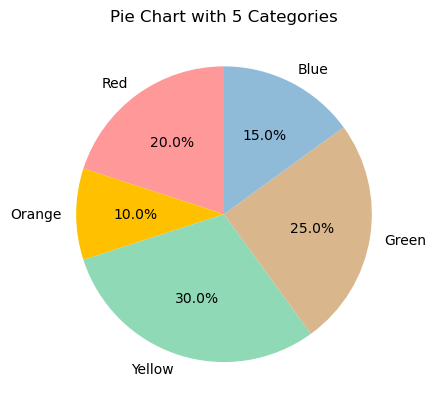

In [49]:
# Data for the pie chart
labels = ['Red', 'Orange', 'Yellow', 'Green', 'Blue']
sizes = [20, 10, 30, 25, 15]

# Define custom colors for each slice
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d9b68c', '#8fbbd9']

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

# Add a title
ax.set_title('Pie Chart with 5 Categories')

# Show the chart
plt.show()


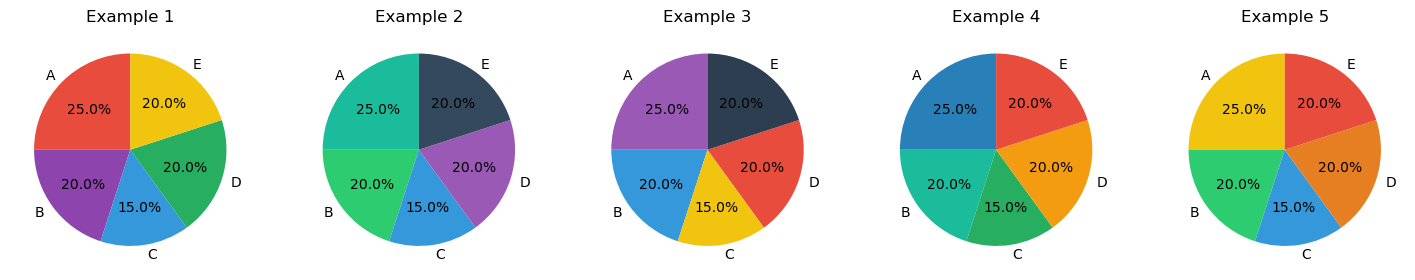

In [50]:
# Data for the pie chart
labels = ['A', 'B', 'C', 'D', 'E']
sizes = [25, 20, 15, 20, 20]

# Example color codes
colors1 = ['#E74C3C', '#8E44AD', '#3498DB', '#27AE60', '#F1C40F']
colors2 = ['#1ABC9C', '#2ECC71', '#3498DB', '#9B59B6', '#34495E']
colors3 = ['#9B59B6', '#3498DB', '#F1C40F', '#E74C3C', '#2C3E50']
colors4 = ['#2980B9', '#1ABC9C', '#27AE60', '#F39C12', '#E74C3C']
colors5 = ['#F1C40F', '#2ECC71', '#3498DB', '#E67E22', '#E74C3C']

# Create subplots for each example
fig, axs = plt.subplots(1, 5, figsize=(18, 4))

# Plot each example on a separate subplot
for i, colors in enumerate([colors1, colors2, colors3, colors4, colors5]):
    axs[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    axs[i].set_title(f'Example {i+1}')

# Display the chart
plt.show()


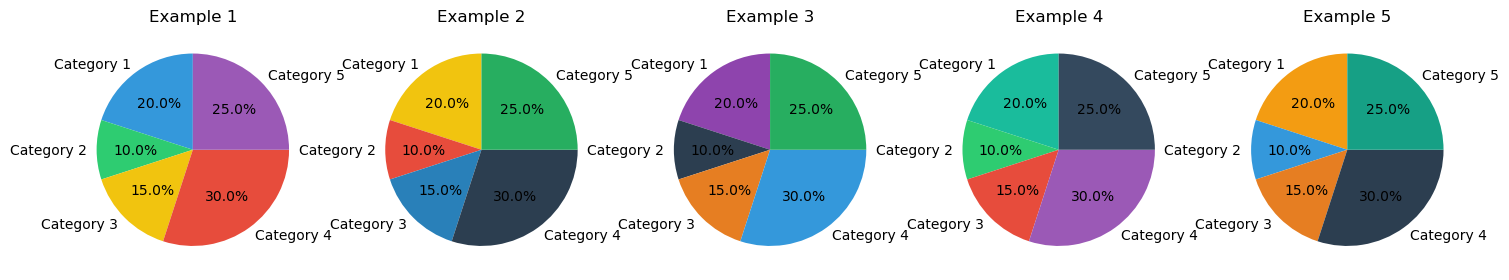

In [51]:
# Data for the pie chart
labels = ['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5']
sizes = [20, 10, 15, 30, 25]

# Example color codes
colors1 = ['#3498DB', '#2ECC71', '#F1C40F', '#E74C3C', '#9B59B6']
colors2 = ['#F1C40F', '#E74C3C', '#2980B9', '#2C3E50', '#27AE60']
colors3 = ['#8E44AD', '#2C3E50', '#E67E22', '#3498DB', '#27AE60']
colors4 = ['#1ABC9C', '#2ECC71', '#E74C3C', '#9B59B6', '#34495E']
colors5 = ['#F39C12', '#3498DB', '#E67E22', '#2C3E50', '#16A085']

# Create subplots for each example
fig, axs = plt.subplots(1, 5, figsize=(18, 4))

# Plot each example on a separate subplot
for i, colors in enumerate([colors1, colors2, colors3, colors4, colors5]):
    axs[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    axs[i].set_title(f'Example {i+1}')

# Display the chart
plt.show()


In [52]:
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,discharge_disposition_id_new,admission_source_id,admission_source_id_new,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,Not Mapped,D25,Physician Referral,AS1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),Emergency,Discharged to home,D1,Emergency Room,AS7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,D1,Emergency Room,AS7,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),Emergency,Discharged to home,D1,Emergency Room,AS7,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),Emergency,Discharged to home,D1,Emergency Room,AS7,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,443847548,100162476,AfricanAmerican,Male,[70-80),Emergency,Discharged/transferred to SNF,D3,Emergency Room,AS7,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101759,443847782,74694222,AfricanAmerican,Female,[80-90),Emergency,Discharged/transferred to ICF,D4,Transfer from a Skilled Nursing Facility (SNF),AS5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101760,443854148,41088789,Caucasian,Male,[70-80),Emergency,Discharged to home,D1,Emergency Room,AS7,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101761,443857166,31693671,Caucasian,Female,[80-90),Urgent,Discharged/transferred to SNF,D3,Emergency Room,AS7,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [53]:
# Getting the value counts for the ages and sorted
age_cat = df['age'].value_counts().sort_index()

# Getting the index value of the ages
age_index = np.array(age_cat.index)

# Getting the age category for the males and getting the value counts for its age index
# and sorting the values to display the age category in order
age_male = df.loc[(df['gender'] == 'Male') &
                      (df['age'].isin(age_index))]['age'].value_counts().sort_index()

# Getting the age category for the females and getting the value counts for its age index
age_female = df.loc[(df['gender'] == 'Female') &
                        (df['age'].isin(age_index))]['age'].value_counts().sort_index()

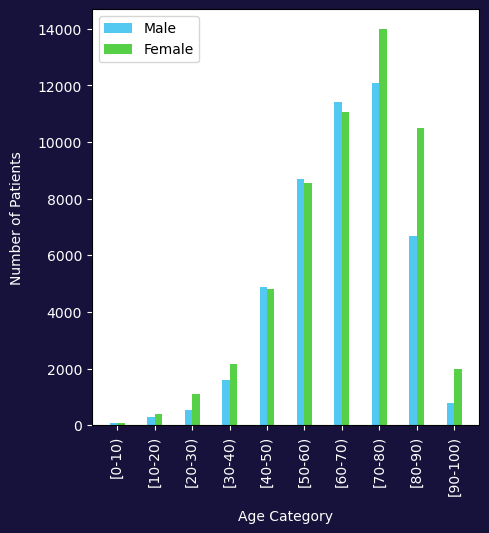

In [54]:
fig = plt.figure(figsize=(5, 5.4), facecolor='#17123B')
            
ax = fig.add_subplot()

x = np.arange(1, len(age_cat) + 1)

# Plotting line
ax.bar(x - 0.1, age_male, width=0.2, label='Male', color='#53C9F2')
ax.bar(x + 0.1, age_female, width=0.2, label='Female', color='#55D047')

# Setting title
# ax.set_title('Number of Visited Patients in each Age category')

# setting labels
ax.set_xlabel('Age Category', labelpad=10, fontdict = {'color': 'w'})
ax.set_ylabel('Number of Patients', labelpad=10, fontdict = {'color': 'w'})

# setting ticks
ax.set_xticks(range(1, len(age_cat) + 1))
ax.set_xticklabels(age_index, rotation=90)
ax.tick_params(axis='x', colors='w')
ax.tick_params(axis='y', colors='w')

# setting legend
ax.legend()

plt.show()

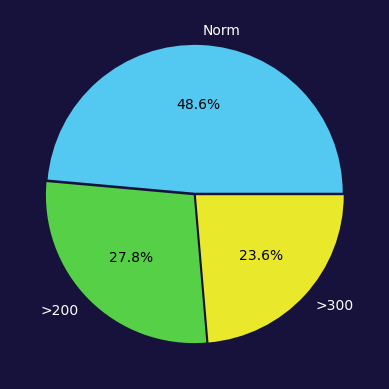

In [55]:
max_glu_serum = df.loc[df['max_glu_serum'] != 'None']['max_glu_serum'].value_counts()

fig = plt.figure(facecolor='#17123B')
ax = fig.add_subplot()

# plotting line
glu = ax.pie(max_glu_serum, labels=max_glu_serum.index, autopct='%1.1f%%',
               explode=np.repeat(0.01, len(max_glu_serum)),
               colors=['#53C9F2', '#55D047', '#E9E82B', '#F74331', '#7E8178'])
for i in glu[1]:
    i.set_color('w')

plt.show()

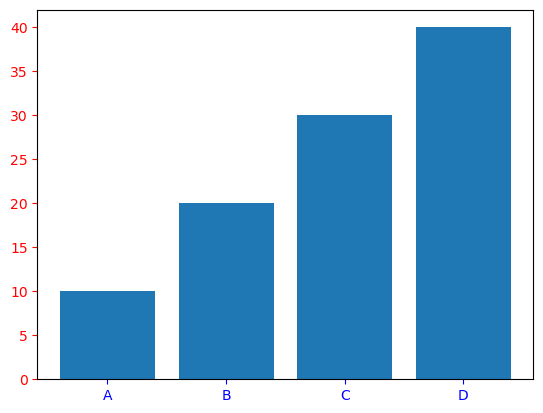

In [56]:
# Create a bar chart
labels = ['A', 'B', 'C', 'D']
values = [10, 20, 30, 40]
fig, ax = plt.subplots()
ax.bar(labels, values)

# Change the color of the tick lines
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')

# Show the plot
plt.show()


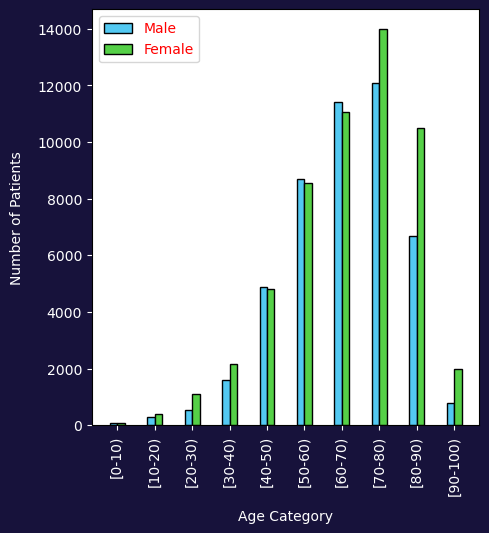

In [107]:
fig = plt.figure(figsize=(5, 5.4), facecolor='#17123B')
            
ax = fig.add_subplot()

x = np.arange(1, len(age_cat) + 1)

# Plotting line
ax.bar(x - 0.1, age_male, width=0.2, label='Male', color='#53C9F2', edgecolor = 'k')
ax.bar(x + 0.1, age_female, width=0.2, label='Female', color='#55D047', edgecolor = 'k')

# Setting title
# ax.set_title('Number of Visited Patients in each Age category')

# setting labels
ax.set_xlabel('Age Category', labelpad=10, fontdict = {'color': 'w'})
ax.set_ylabel('Number of Patients', labelpad=10, fontdict = {'color': 'w'})

# setting ticks
ax.set_xticks(range(1, len(age_cat) + 1))
ax.set_xticklabels(age_index, rotation=90)
ax.tick_params(axis='x', colors='w')
ax.tick_params(axis='y', colors='w')

# setting legend
l = ax.legend()
for text in l.get_texts():
    text.set_color('r')

plt.show()

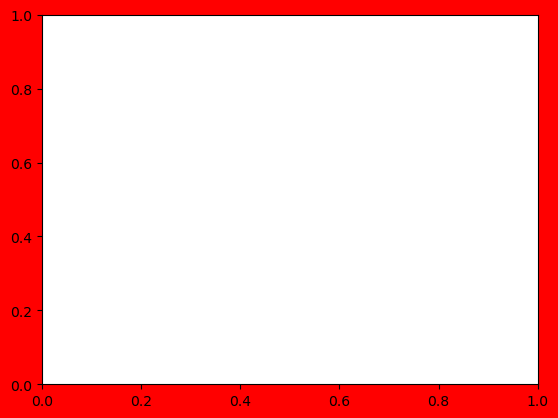

In [109]:
fig = plt.figure(facecolor = 'r', )
ax = fig.add_subplot()